In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


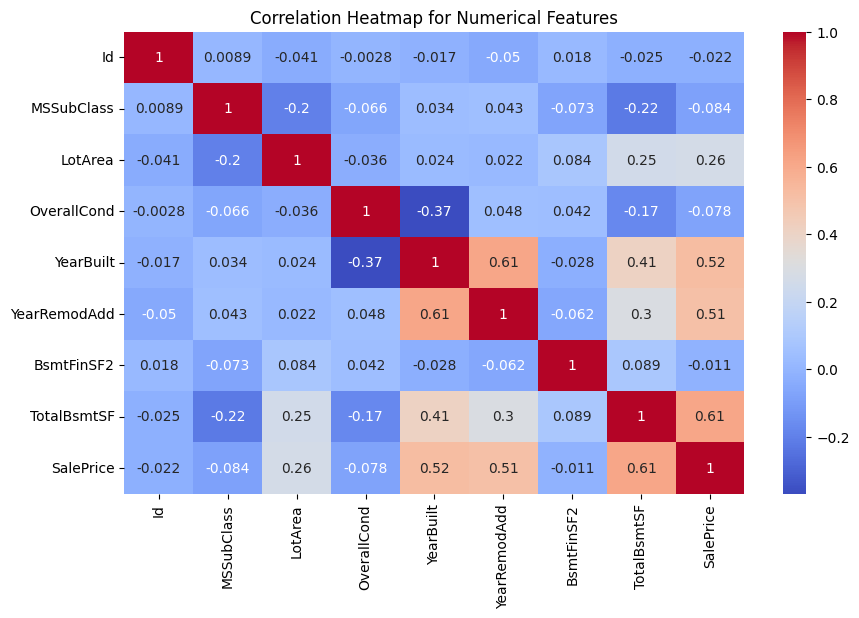

In [5]:
# plotting heatmap for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()



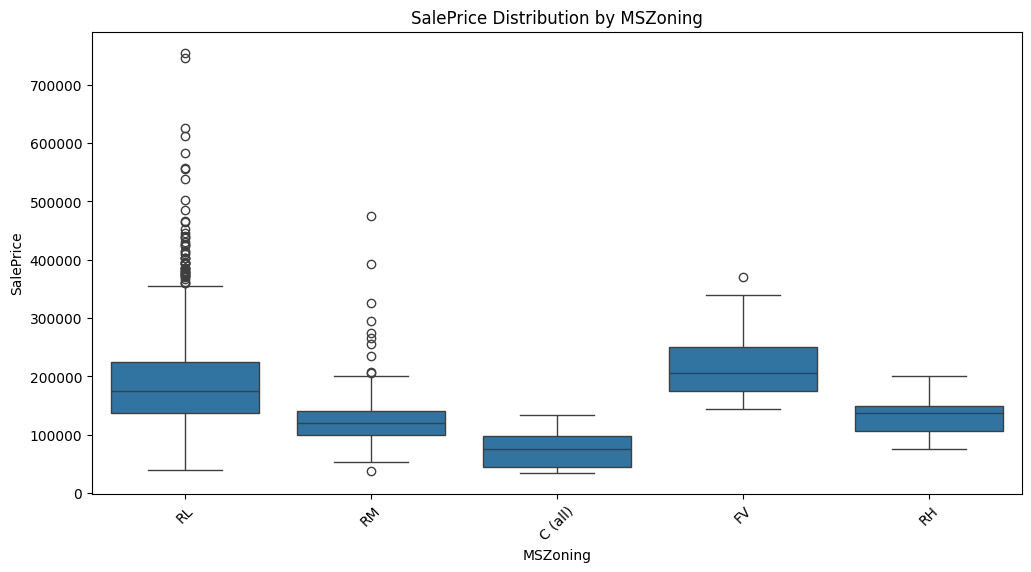

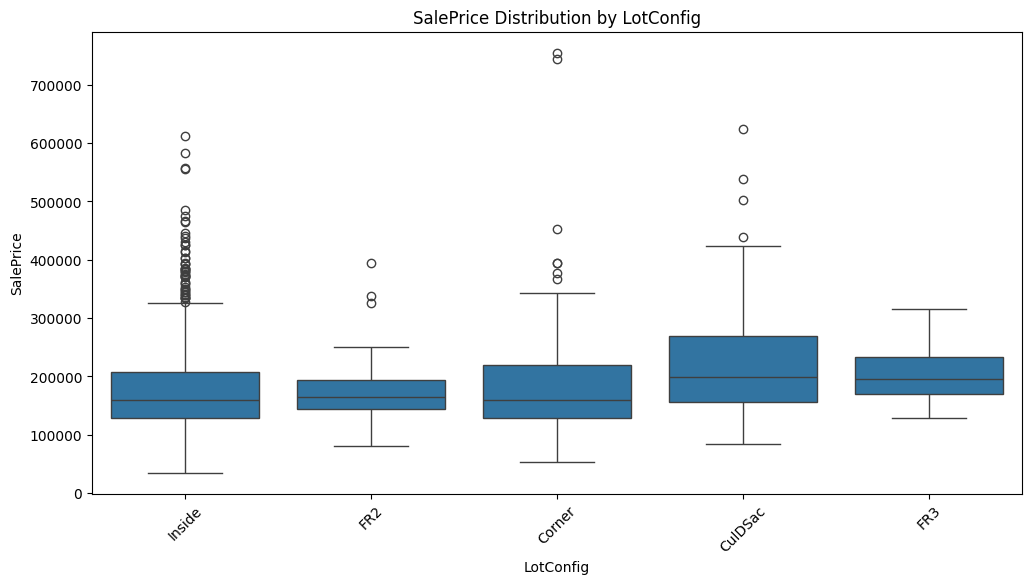

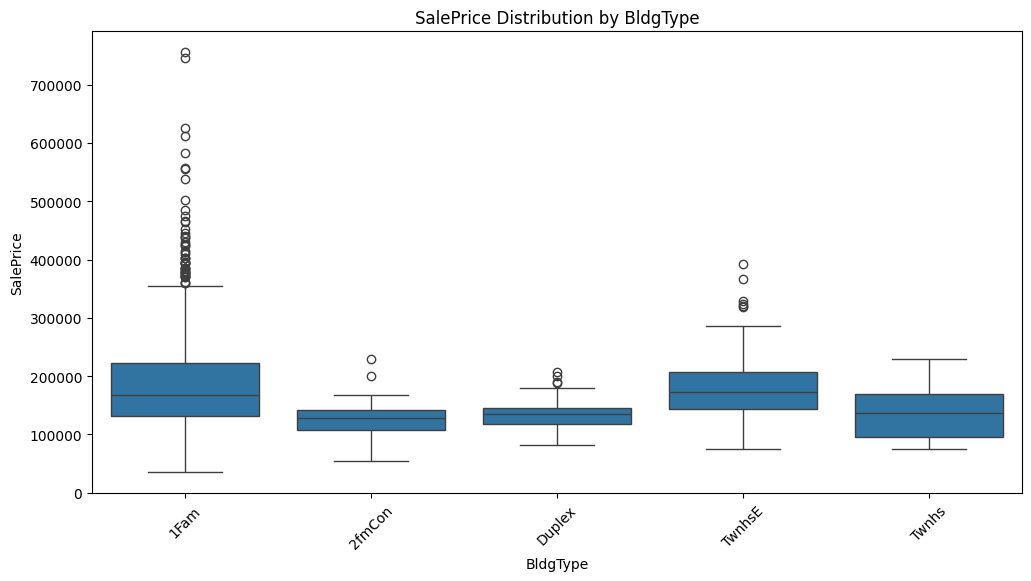

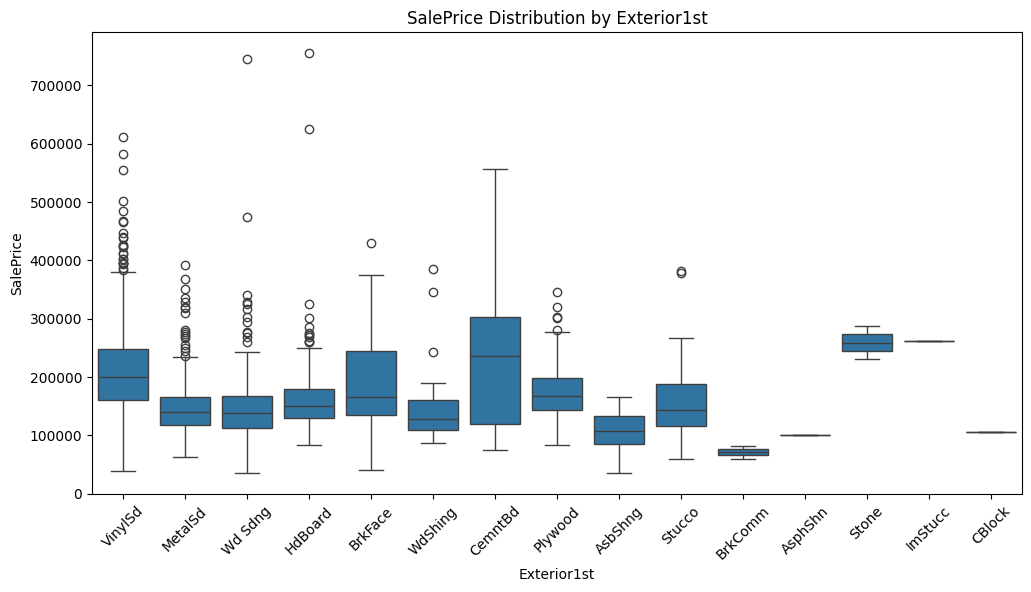

In [6]:
# To analyze different categorical features and their impact on the target variable 'SalePrice' in unique plots
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'SalePrice Distribution by {col}')
    plt.xticks(rotation=45)
    plt.show()

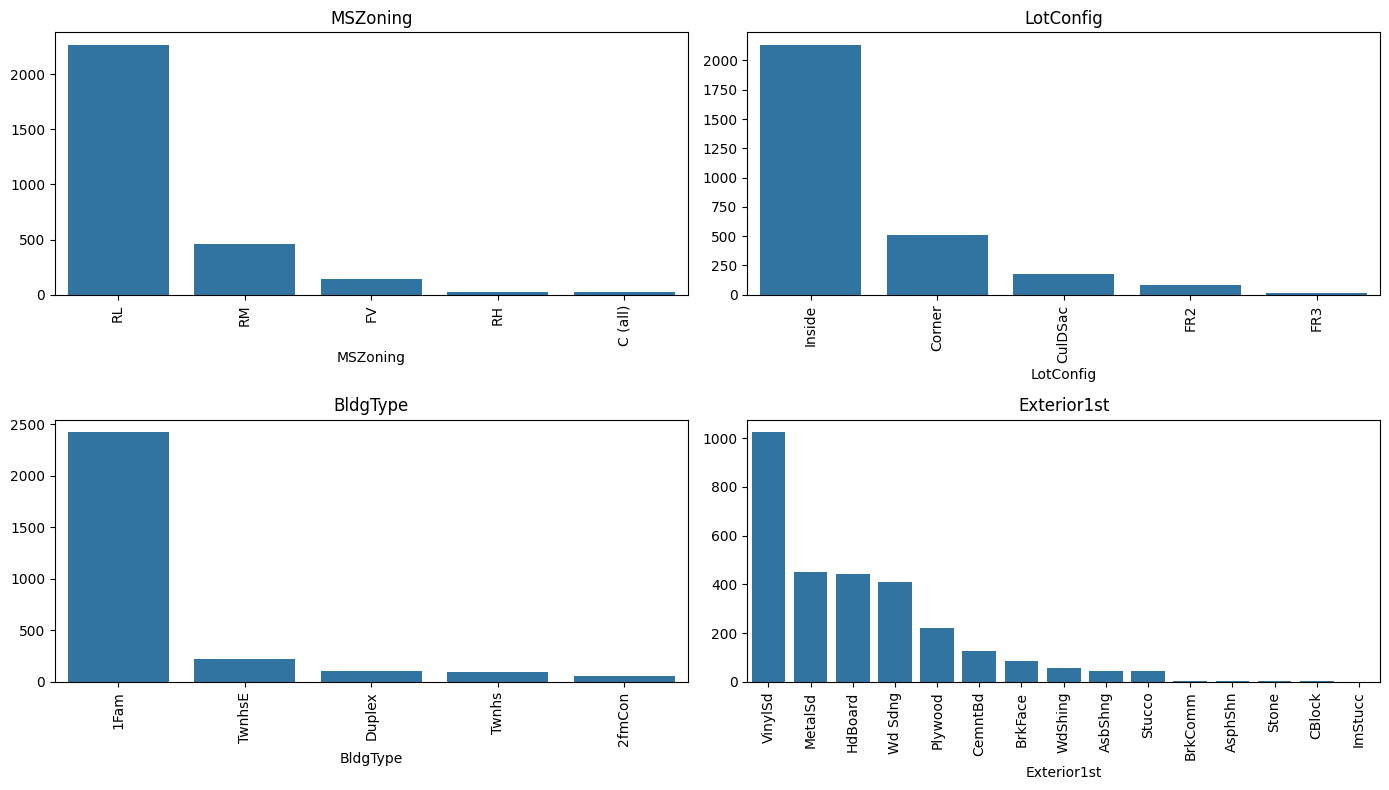

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

object_cols = df.select_dtypes(include=['object']).columns

n = len(object_cols)         # number of categorical columns
cols = 2                     # number of plots per row
rows = math.ceil(n / cols)   # automatically calculate needed rows

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(object_cols):
    y = df[col].value_counts()
    sns.barplot(x=y.index, y=y.values, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off extra axes (if any)
for j in range(len(object_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show() 


In [8]:
df.drop('Id' , axis=1, inplace=True)

In [9]:
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [10]:
df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].mean())
df = df.dropna()

In [11]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [13]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [14]:
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

models = {
    "RandomForest": RandomForestRegressor(n_estimators=300, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=None, random_state=42,bootstrap=True),
    "XGBoost": XGBRegressor(subsample=0.7, reg_lambda=10, reg_alpha=0.5, n_estimators=500, max_depth=3, learning_rate=0.01, colsample_bytree=0.6, random_state=42)
}

for name, reg in models.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)                     
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print("-" * 30)


RandomForest Performance:
Mean Absolute Error: 32394.089485085307
Mean Squared Error: 2258767687.723654
Root Mean Squared Error: 47526.4945869528
R^2 Score: 0.3804923730630373
------------------------------
XGBoost Performance:
Mean Absolute Error: 32353.902176170137
Mean Squared Error: 2239033313.412757
Root Mean Squared Error: 47318.42467171489
R^2 Score: 0.3859048798316064
------------------------------


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=3, scoring='r2', random_state=42
)

search.fit(X_train, y_train)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)


Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Best Score: 0.33017554674144894


In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1, 5, 10],
    'reg_lambda': [1, 2, 5, 10]
}

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,             # number of random combinations
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best Score: 0.33368497604058606


In [19]:
import joblib

# save encoder you fitted earlier
joblib.dump(OH_encoder, "encoder.pkl")

# save the best model (assuming XGBoost performed better)
joblib.dump(models["XGBoost"], "model.pkl")

# confirm files written
import os
print(os.listdir('.'))


['app.py', 'encoder.pkl', 'HousePricePrediction.xlsx', 'House_price_prediction.ipynb', 'model.pkl', 'requirements.txt']


In [20]:
import joblib
feature_order = df_final.drop('SalePrice', axis=1).columns.tolist()
joblib.dump(feature_order, "feature_order.pkl")


['feature_order.pkl']